<a href="https://colab.research.google.com/github/octaviadyah3/sentimenanalysis-using-lexiconbased-and-logisticregression/blob/main/PREPROCESSING_AND_LEXICON_LABELLING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREPROCESSING TEXT (BISMILLAH)**

In [ ]:
import pandas as pd
import numpy as np
tweet = pd.read_csv("/content/combined_pilpres.csv", sep=';')
columns_to_drop = [
    'created_at', 'id_str', 'quote_count', 'reply_count', 'retweet_count',
    'favorite_count', 'lang', 'user_id_str', 'conversation_id_str',
    'username', 'tweet_url'
]
tweet = tweet.drop(columns=[col for col in columns_to_drop if col in tweet.columns])
print("\nDataFrame setelah drop kolom:")

tweet.head()


DataFrame setelah drop kolom:


,full_text
0,Sidang perdana sengketa hasil Pilpres 2024 di ...
1,@felixbolanosg Vuestra memoria felisuco estáis...
2,"Isi Gugatan di Sengketa Pilpres 2024, Ganjar M..."
3,@PUTRY_NUSANTARA @AyamSegar3 Mereka itu hanyal...
4,@blue_berets7 Wkwkwk bujer 02... mau coba alih...


CASEFOLDING

In [ ]:
tweet['Text Case Folding'] = tweet['full_text'].str.lower()


print('Case Folding Result : \n')
print(tweet['Text Case Folding'].head(5))
print('\n\n\n')

Case Folding Result : 

0    sidang perdana sengketa hasil pilpres 2024 di ...
1    @felixbolanosg vuestra memoria felisuco estáis...
2    isi gugatan di sengketa pilpres 2024, ganjar m...
3    @putry_nusantara @ayamsegar3 mereka itu hanyal...
4    @blue_berets7 wkwkwk bujer 02... mau coba alih...
Name: Text Case Folding, dtype: object






TOKENIZING

In [ ]:
import string
import re #regex library
import nltk
nltk.download('punkt')

# import word_tokenize
from nltk.tokenize import word_tokenize
def remove_tweet_special(text):
    if isinstance(text, str):
        # Remove tab, new line, and back slice
        text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
        # Remove non-ASCII (emoticon, Chinese word, etc.)
        text = text.encode('ascii', 'replace').decode('ascii')
        # Remove links
        text = text.replace("http://", " ").replace("https://", " ")
        return text
    return text  # Return the text as is if it's not a string

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    if isinstance(text, str):
        return re.sub(r"\d+", "", text)
    return text  # Return the text as is if it's not a string

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_number)

#remove punctiation
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans("", "", string.punctuation))
    return text  # Return the text as is if it's not a string

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    if isinstance(text, str):
        return text.strip()
    return text  # Return the text as is if it's not a string

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    if isinstance(text, str):
        return re.sub('\s+', ' ', text)
    return text  # Return the text as is if it's not a string

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    if isinstance(text, str):
        return re.sub(r"\b[a-zA-Z]\b", "", text)
    return text  # Return the text as is if it's not a string

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_singl_char)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return []  # Return an empty list if the input is not a string

tweet['Text Tokenizing'] = tweet['Text Case Folding'].apply(word_tokenize_wrapper)


print('Tokenizing Result : \n')
print(tweet['Text Tokenizing'].head())
print('\n\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenizing Result : 

0    [sidang, perdana, sengketa, hasil, pilpres, di...
1    [felixbolanosg, vuestra, memoria, felisuco, es...
2    [isi, gugatan, di, sengketa, pilpres, ganjar, ...
3    [putrynusantara, ayamsegar, mereka, itu, hanya...
4    [blueberets, wkwkwk, bujer, mau, coba, alihin,...
Name: Text Tokenizing, dtype: object






**NORMALIZATION**

In [ ]:
normalizad_word = pd.read_excel("/content/kamuskatabaku.xlsx")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

tweet['Text Normalization'] = tweet['Text Tokenizing'].apply(normalized_term)

tweet['Text Normalization'].head()

0    [sidang, perdana, sengketa, hasil, pilpres, di...
1    [felixbolanosg, vuestra, memoria, felisuco, es...
2    [isi, gugatan, di, sengketa, pilpres, ganjar, ...
3    [putrynusantara, ayamsegar, mereka, itu, hanya...
4    [blueberets, wkwkwk, bujer, mau, coba, alihin,...
Name: Text Normalization, dtype: object

**STEMMING**

In [ ]:
# import Sastrawi package
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install swifter
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}

for document in tweet['Text Normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet['Text Stemming'] = tweet['Text Normalization'].swifter.apply(get_stemmed_term)
print(tweet['Text Stemming'])

Streaming output truncated to the last 5000 lines.
post : post
cok : cok
tololll : tololll
patokan : patok
masak : masak
rada : rada
partidaa : partidaa
gil : gil
camisa : camisa
zagueiro : zagueiro
respeito : respeito
gerao : gerao
bela : bela
dupla : dupla
jovem : jovem
joaquim : joaquim
organizado : organizado
carille : carille
apoyo : apoyo
tham : tham
memutar : putar
balikkan : balik
maunya : mau
bagai : bagai
lawannya : lawan
mahar : mahar
lluurriizzaann : lluurriizzaann
detikedu : detikedu
nymbng : nymbng
arahnya : arah
jmileielecto : jmileielecto
ajuste : ajuste
recorte : recorte
auditar : auditar
meses : meses
ahora : ahora
debera : debera
hacerse : hacerse
crecimiento : crecimiento
ningn : ningn
desarrolla : desarrolla
ffigueiredo : ffigueiredo
nesta : nesta
data : data
especial : especial
marcha : marcha
defender : defender
atacar : atacar
cristos : cristos
radicais : radicais
islmicos : islmicos
cumprir : cumprir
visa : visa
nossa : nossa
finalmente : finalmente
regime : re

Pandas Apply:   0%|          | 0/1723 [00:00<?, ?it/s]

0       [sidang, perdana, sengketa, hasil, pilpres, di...
1       [felixbolanosg, vuestra, memoria, felisuco, es...
2       [isi, gugat, di, sengketa, pilpres, ganjar, ma...
3       [putrynusantara, ayamsegar, mereka, itu, hanya...
4       [blueberets, wkwkwk, bujer, mau, coba, alihin,...
                              ...                        
1718                                                   []
1719                                                   []
1720                                                   []
1721                                                   []
1722                                                   []
Name: Text Stemming, Length: 1723, dtype: object


**FILTERING**

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken',
                       'allah', 'brb', 'btw', 'b/c', 'cod', 'cmiiw', 'fyi',
                       'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao', 'oot',
                       'pap', 'otw', 'tfl', 'vc', 'ygy'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/stopwordbahasa.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweet['Text Filtering'] = tweet['Text Stemming'].apply(stopwords_removal)


print(tweet['Text Filtering'].head())

0    [sidang, perdana, sengketa, hasil, pilpres, ma...
1    [felixbolanosg, vuestra, memoria, felisuco, es...
2    [isi, gugat, sengketa, pilpres, ganjar, mahfud...
3    [putrynusantara, ayamsegar, tim, hore, bowo, k...
4    [blueberets, wkwkwk, bujer, coba, alihin, isu,...
Name: Text Filtering, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**View Preprocessing Results**

In [ ]:
tweet.head()

,full_text,Text Case Folding,Text Tokenizing,Text Normalization,Text Stemming,Text Filtering
0,Sidang perdana sengketa hasil Pilpres 2024 di ...,sidang perdana sengketa hasil pilpres di mk at...,"[sidang, perdana, sengketa, hasil, pilpres, di...","[sidang, perdana, sengketa, hasil, pilpres, di...","[sidang, perdana, sengketa, hasil, pilpres, di...","[sidang, perdana, sengketa, hasil, pilpres, ma..."
1,@felixbolanosg Vuestra memoria felisuco estáis...,felixbolanosg vuestra memoria felisuco estis d...,"[felixbolanosg, vuestra, memoria, felisuco, es...","[felixbolanosg, vuestra, memoria, felisuco, es...","[felixbolanosg, vuestra, memoria, felisuco, es...","[felixbolanosg, vuestra, memoria, felisuco, es..."
2,"Isi Gugatan di Sengketa Pilpres 2024, Ganjar M...",isi gugatan di sengketa pilpres ganjar mahfud ...,"[isi, gugatan, di, sengketa, pilpres, ganjar, ...","[isi, gugatan, di, sengketa, pilpres, ganjar, ...","[isi, gugat, di, sengketa, pilpres, ganjar, ma...","[isi, gugat, sengketa, pilpres, ganjar, mahfud..."
3,@PUTRY_NUSANTARA @AyamSegar3 Mereka itu hanyal...,putrynusantara ayamsegar mereka itu hanyalah t...,"[putrynusantara, ayamsegar, mereka, itu, hanya...","[putrynusantara, ayamsegar, mereka, itu, hanya...","[putrynusantara, ayamsegar, mereka, itu, hanya...","[putrynusantara, ayamsegar, tim, hore, bowo, k..."
4,@blue_berets7 Wkwkwk bujer 02... mau coba alih...,blueberets wkwkwk bujer mau coba alihin isu pi...,"[blueberets, wkwkwk, bujer, mau, coba, alihin,...","[blueberets, wkwkwk, bujer, mau, coba, alihin,...","[blueberets, wkwkwk, bujer, mau, coba, alihin,...","[blueberets, wkwkwk, bujer, coba, alihin, isu,..."


In [ ]:
tweet.drop_duplicates(subset = 'full_text', inplace = True)
tweet.shape

(1521, 6)

In [ ]:
tweet.head()

,full_text,Text Case Folding,Text Tokenizing,Text Normalization,Text Stemming,Text Filtering
0,Sidang perdana sengketa hasil Pilpres 2024 di ...,sidang perdana sengketa hasil pilpres di mk at...,"[sidang, perdana, sengketa, hasil, pilpres, di...","[sidang, perdana, sengketa, hasil, pilpres, di...","[sidang, perdana, sengketa, hasil, pilpres, di...","[sidang, perdana, sengketa, hasil, pilpres, ma..."
1,@felixbolanosg Vuestra memoria felisuco estáis...,felixbolanosg vuestra memoria felisuco estis d...,"[felixbolanosg, vuestra, memoria, felisuco, es...","[felixbolanosg, vuestra, memoria, felisuco, es...","[felixbolanosg, vuestra, memoria, felisuco, es...","[felixbolanosg, vuestra, memoria, felisuco, es..."
2,"Isi Gugatan di Sengketa Pilpres 2024, Ganjar M...",isi gugatan di sengketa pilpres ganjar mahfud ...,"[isi, gugatan, di, sengketa, pilpres, ganjar, ...","[isi, gugatan, di, sengketa, pilpres, ganjar, ...","[isi, gugat, di, sengketa, pilpres, ganjar, ma...","[isi, gugat, sengketa, pilpres, ganjar, mahfud..."
3,@PUTRY_NUSANTARA @AyamSegar3 Mereka itu hanyal...,putrynusantara ayamsegar mereka itu hanyalah t...,"[putrynusantara, ayamsegar, mereka, itu, hanya...","[putrynusantara, ayamsegar, mereka, itu, hanya...","[putrynusantara, ayamsegar, mereka, itu, hanya...","[putrynusantara, ayamsegar, tim, hore, bowo, k..."
4,@blue_berets7 Wkwkwk bujer 02... mau coba alih...,blueberets wkwkwk bujer mau coba alihin isu pi...,"[blueberets, wkwkwk, bujer, mau, coba, alihin,...","[blueberets, wkwkwk, bujer, mau, coba, alihin,...","[blueberets, wkwkwk, bujer, mau, coba, alihin,...","[blueberets, wkwkwk, bujer, coba, alihin, isu,..."


**Save Preprocessing Result**

In [ ]:
tweet.to_excel("preprocessing_hasil.xlsx", index=False)

In [ ]:
df= tweet.drop(columns=['full_text', 'Text Case Folding', 'Text Tokenizing', 'Text Normalization', 'Text Stemming'])
df.head()

,Text Filtering
0,"[sidang, perdana, sengketa, hasil, pilpres, ma..."
1,"[felixbolanosg, vuestra, memoria, felisuco, es..."
2,"[isi, gugat, sengketa, pilpres, ganjar, mahfud..."
3,"[putrynusantara, ayamsegar, tim, hore, bowo, k..."
4,"[blueberets, wkwkwk, bujer, coba, alihin, isu,..."


**LABELLING LEXICON BASED INSET**

In [ ]:
lexicon_positive = pd.read_excel('/content/kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('/content/kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'Positive'
    elif (score < 0):
        sentimen = 'Negative'
    else:
        sentimen = 'Neutral'
    return score, sentimen
results = df['Text Filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['Polarity Score'] = results[0]
df['Indonesia Sentiment'] = results[1]
#data['sentimen'] = results[1]
#data

df[['Text Filtering','Polarity Score','Indonesia Sentiment']]

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"[sidang, perdana, sengketa, hasil, pilpres, ma...",-2,Negative
1,"[felixbolanosg, vuestra, memoria, felisuco, es...",0,Neutral
2,"[isi, gugat, sengketa, pilpres, ganjar, mahfud...",0,Neutral
3,"[putrynusantara, ayamsegar, tim, hore, bowo, k...",-10,Negative
4,"[blueberets, wkwkwk, bujer, coba, alihin, isu,...",1,Positive
...,...,...,...
1520,"[genuinely, asking, pilpres, foll, fanart, aba...",1,Positive
1521,"[masveel, rupa, habis, pilpres, garuk, kpk]",0,Neutral
1522,[],0,Neutral
1578,"[buzzerrp, kalah, kelas, puanmaharaniri, hasto...",-7,Negative


HASIL AKUMULASI SENTIMENT

In [ ]:
inset_counts = df['Indonesia Sentiment'].value_counts()
inset_counts

Indonesia Sentiment
Negative    831
Neutral     388
Positive    302
Name: count, dtype: int64

**SAVE LABELLING HASIL**

In [ ]:
df.to_excel("hasil_sentimen_polarity.xlsx", index=False)

**LABELLING RESULTS VISUALIZATION**

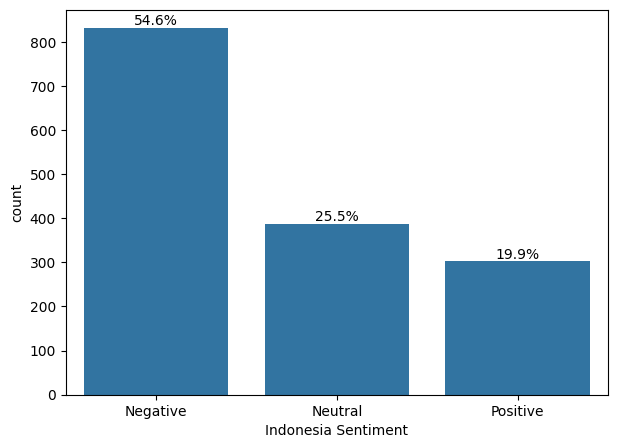

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5));
g = sns.countplot(x='Indonesia Sentiment', data=df)

ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
         textcoords='offset points')

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("/content/hasil_sentimen_polarity.xlsx")

df

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"['sidang', 'perdana', 'sengketa', 'hasil', 'pi...",-2,Negative
1,"['felixbolanosg', 'vuestra', 'memoria', 'felis...",0,Neutral
2,"['isi', 'gugat', 'sengketa', 'pilpres', 'ganja...",0,Neutral
3,"['putrynusantara', 'ayamsegar', 'tim', 'hore',...",-10,Negative
4,"['blueberets', 'wkwkwk', 'bujer', 'coba', 'ali...",1,Positive
...,...,...,...
1516,"['genuinely', 'asking', 'pilpres', 'foll', 'fa...",1,Positive
1517,"['masveel', 'rupa', 'habis', 'pilpres', 'garuk...",0,Neutral
1518,[],0,Neutral
1519,"['buzzerrp', 'kalah', 'kelas', 'puanmaharaniri...",-7,Negative


**WORLDCLOUD**

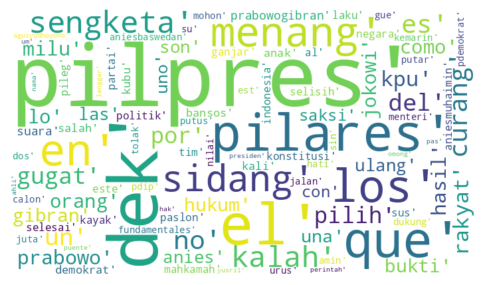

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Negative']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

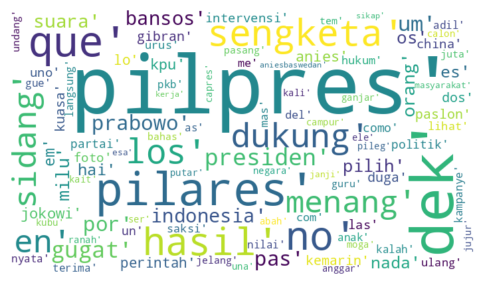

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Positive']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

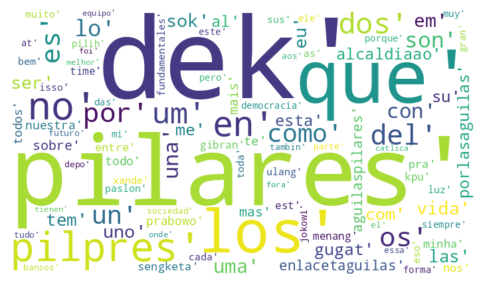

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Neutral']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
!pip install pandas numpy nltk scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from gensim.models import Word2Vec

In [ ]:
import pandas as pd
import numpy as np

df_train = pd.read_excel("/content/hasil_sentimen_polarity.xlsx")

df_train

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"['sidang', 'perdana', 'sengketa', 'hasil', 'pi...",-2,Negative
1,"['felixbolanosg', 'vuestra', 'memoria', 'felis...",0,Neutral
2,"['isi', 'gugat', 'sengketa', 'pilpres', 'ganja...",0,Neutral
3,"['putrynusantara', 'ayamsegar', 'tim', 'hore',...",-10,Negative
4,"['blueberets', 'wkwkwk', 'bujer', 'coba', 'ali...",1,Positive
...,...,...,...
1516,"['genuinely', 'asking', 'pilpres', 'foll', 'fa...",1,Positive
1517,"['masveel', 'rupa', 'habis', 'pilpres', 'garuk...",0,Neutral
1518,[],0,Neutral
1519,"['buzzerrp', 'kalah', 'kelas', 'puanmaharaniri...",-7,Negative
